In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import chart_studio.plotly as py
import seaborn as sns
sns.set(context="talk")
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()

# Basics

In [2]:
arr_1 = np.random.rand(50, 4)
df_1 = pd.DataFrame(arr_1, columns=["A", "B", "C", "D"])

In [3]:
df_1.head(3)

,A,B,C,D
0,0.441608,0.090143,0.520084,0.329616
1,0.652061,0.437835,0.074968,0.563031
2,0.320286,0.058954,0.374221,0.562711


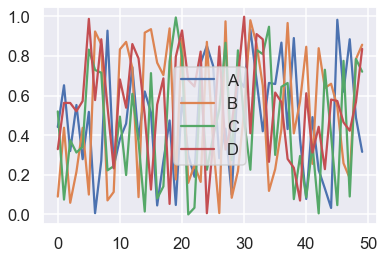

In [4]:
df_1.plot()

In [5]:
df_1.iplot()

# line plot

In [6]:
import plotly.graph_objects as go

In [7]:
df_stocks = px.data.stocks()

In [8]:
px.line(df_stocks, x="date", y="GOOG", labels={"date":"Date", "GOOG":"Price"})

In [9]:
px.line(df_stocks, x="date", y=["GOOG", "AAPL"],
        labels={"date":"Date", "value":"Price"},
       title="Apple vs Google")

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["AAPL"], mode="lines", name="Apple"))
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["AMZN"], mode="lines+markers", name="Amazon"))
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["GOOG"], mode="lines+markers", name="Google", line=dict(color="firebrick", width=2, dash="dashdot")))

fig

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["AAPL"], mode="lines", name="Apple"))
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["AMZN"], mode="lines+markers", name="Amazon"))
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["GOOG"], mode="lines+markers", name="Google", line=dict(color="firebrick", width=2, dash="dashdot")))

fig.update_layout(title="Stock Price Data 2018 - 2020", xaxis_title="Tanggal", yaxis_title=("Harga"))
fig

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["AAPL"], mode="lines", name="Apple"))
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["AMZN"], mode="lines+markers", name="Amazon"))
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["GOOG"], mode="lines+markers", name="Google", line=dict(color="firebrick", width=2, dash="dashdot")))

fig.update_layout(title="Stock Price Data 2018 - 2020", xaxis_title="Tanggal", yaxis_title=("Harga"))

fig.update_layout(
    xaxis = dict(showline=True, showgrid=False, showticklabels=True,
             linecolor="rgb(204, 204, 204)",
             linewidth=2, ticks="outside",
             tickfont=dict(family="Arial", size=12,
                           color="rgb(82, 82, 82)")),
    yaxis = dict(showgrid=False, zeroline=False, showline=False,
             showticklabels=False),
    autosize=True,
    margin = dict(autoexpand=True, l=100, r=20, t=50),
    showlegend=True,
    plot_bgcolor="white"
)

fig

# Bar plot

In [13]:
df_us = px.data.gapminder().query("country == 'United States'")

In [14]:
px.bar(df_us, x="year", y="pop", labels={"year":"Tahun", "pop":"Populasi"},
       title="Perkembangan Populasi")

In [15]:
df_tips = px.data.tips()

In [16]:
df_tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [17]:
px.bar(df_tips, x="day", y="tip", color="sex", title="Tips by Sex on Each Day",
       labels={"tip":"Jumlah Tip", "day":"Hari"})

In [18]:
px.bar(df_tips, x="sex", y="total_bill", color="smoker", barmode="group")

In [19]:
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 207")

In [20]:
df_europe

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num


# Scatter Plot

In [21]:
df_iris = px.data.iris()

In [22]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1


In [23]:
px.scatter(df_iris, x="sepal_width", y="sepal_length", color="species", size="petal_length", hover_data=["petal_width"])

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = df_iris["sepal_width"], y=df_iris["sepal_length"], mode="markers",
    marker_color=df_iris["sepal_width"], text=df_iris["species"],
    marker = dict(showscale=True)
))

fig.update_traces(marker_line_width=2, marker_size=10)